In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format #supress scientific notation
plt.rcParams['figure.figsize'] = (12, 8)

### Read Data

In [5]:
loan = pd.read_csv("data/train.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,nan,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,"1,508.00",128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,"2,358.00",120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y


# Bi-variate Analysis 

Finds out the relationship between two variables. we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

## 1. Continous vs Continous
While doing bi-variate analysis between two continuous variables, we should look at scatter plot. It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship between variables. The relationship can be linear or non-linear.

###### Scaterrplot


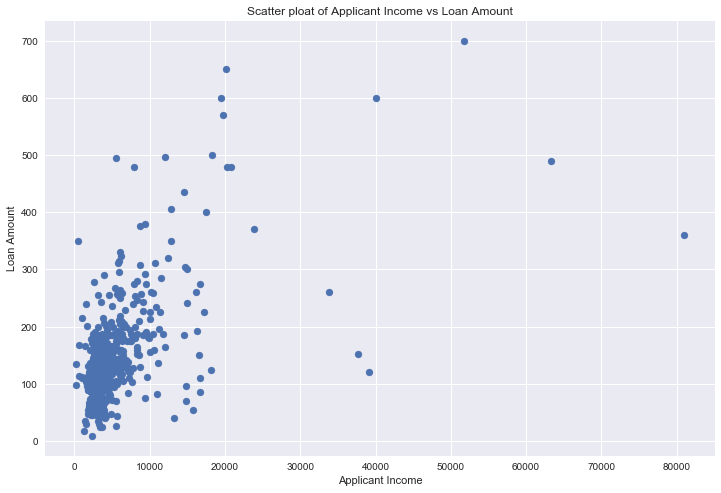

In [27]:
fig, ax = plt.subplots()
ax.set(title = "Scatter ploat of Applicant Income vs Loan Amount", xlabel="Applicant Income", ylabel="Loan Amount")
plt.scatter(x='ApplicantIncome',y='LoanAmount',data=loan)
plt.show()

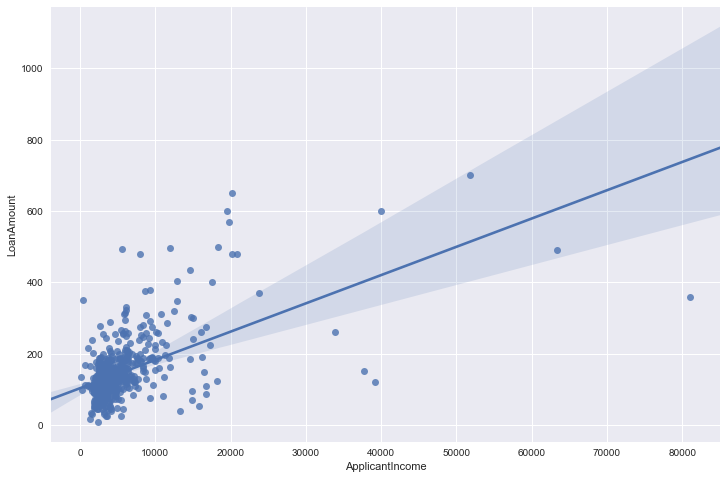

In [35]:
sns.regplot(x=loan["ApplicantIncome"], y=loan["LoanAmount"], fit_reg=True)

###### Jointplot

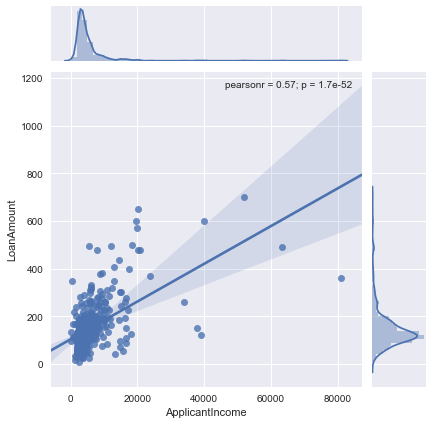

In [39]:
sns.jointplot("ApplicantIncome", "LoanAmount", loan, kind="reg")

Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

-  -1: perfect negative linear correlation
-  +1:perfect positive linear correlation and 
-  0: No correlation

Correlation can be derived using following formula:
>Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))

Various tools have function or functionality to identify correlation between variables. In Excel, function CORREL() is used to return the correlation between two variables and SAS uses procedure PROC CORR to identify the correlation. These function returns Pearson Correlation value to identify the relationship between two variables:


###### Correlation

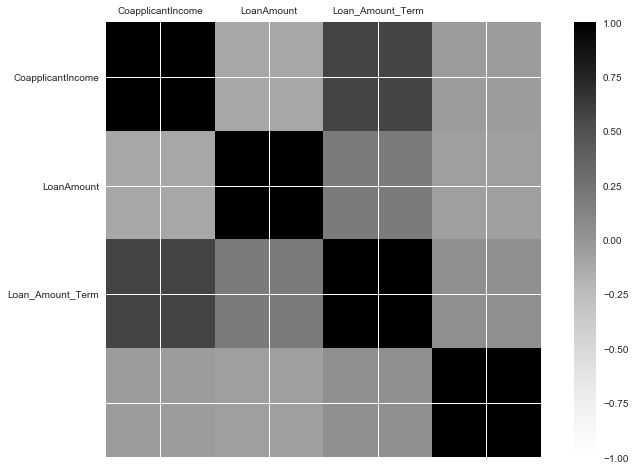

In [37]:
loan_num = loan[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]
correlations = loan_num.corr()

fig, ax=plt.subplots()
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set(xticklabels=loan_num.columns,yticklabels=loan_num.columns)
plt.show()

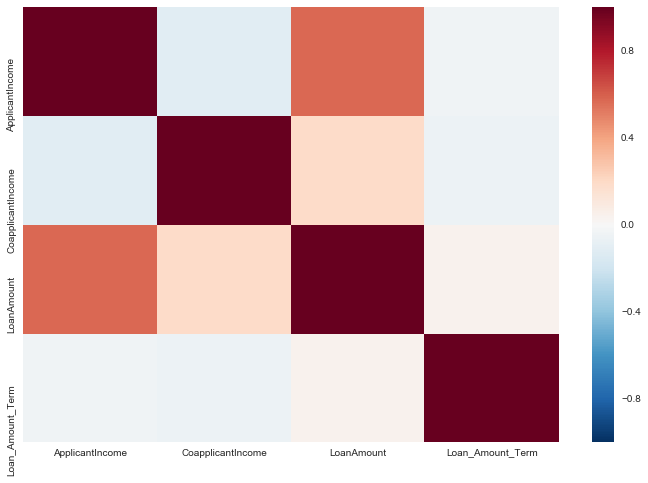

In [45]:
#seaborn
sns.heatmap(correlations)

## 2. Categorical vs Categorical

To find the relationship between two categorical variables, we can use following methods:

**Two-way table:** We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.

Let's see how loan status is related to the *Loan Amount* variable. We’ll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn`.

In [47]:
pd.crosstab(loan['Loan_Status'], loan['LoanAmount'], margins=True)

LoanAmount,9.0,17.0,25.0,26.0,30.0,35.0,36.0,40.0,42.0,44.0,...,480.0,490.0,495.0,496.0,500.0,570.0,600.0,650.0,700.0,All
Loan_Status,,,,,,,,,,,,,,,,,,,,,
N,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,0,181
Y,0,1,2,1,2,0,1,2,1,2,...,2,1,0,1,0,0,2,1,1,411
All,1,1,2,1,2,1,1,2,1,2,...,3,1,1,1,1,1,2,1,1,592


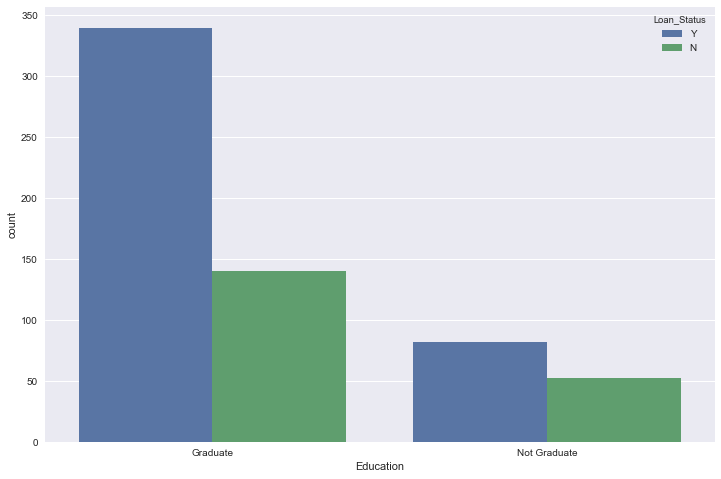

In [48]:
sns.countplot(x='Education', hue='Loan_Status', data=loan);

**Stacked Column Chart:** This method is more of a visual form of Two-way table.

**Chi-Square Test:** This test is used to derive the statistical significance of relationship between the variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well. Chi-square is based on the difference between the expected and observed frequencies in one or more categories in the two-way table. It returns probability for the computed chi-square distribution with the degree of freedom.
    - Probability of 0: It indicates that both categorical variable are dependent
    - Probability of 1: It shows that both variables are independent.
    - Probability less than 0.05: It indicates that the relationship between the variables is significant at 95% confidence.


##  3. Categorical vs Continous


While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA.

###### Z-Test/ T-Test

If the probability of Z is small then the difference of two averages is more significant. The T-test is very similar to Z-test but it is used when number of observation for both categories is less than 30.

######  ANOVA

It assesses whether the average of more than two groups is statistically different.